<a href="https://colab.research.google.com/github/moviedatascience/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt


sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
s = len(sales)
mean = sum(sales) / len(sales)
# mean calculation
sales.sort()
if s % 2 == 0:
  median1 = sales[s//2]
  median2 = sales[s//2 - 1]
  median = (median1 + median2)/2
else:
  median = sales[s//2]
print("Sales median is:" + str(median))

#calculating variance
sales_var = sum((xi - median) ** 2 for xi in sales) / (len(sales) -1)
print("Sales Variance is: " + str(sales_var))

#calculating standard deviation
# sales_std = sqrt(sum([(number - mean(sales)) ** 2 for number in sales]) / (len(sales) - 1))
# print("The standard deviation is: " + str(sales_std))
print("The standard deviation is: " + str(np.std(sales)))

sales_std = np.std(sales, ddof=1)
sales_std

Sales median is:3027
Sales Variance is: 215159.33333333334
The standard deviation is: 428.67360686714756


463.02041505953576

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [3]:
numer = np.cov(sales, customers)
numer

array([[214387.9047619 ,   -869.64285714],
       [  -869.64285714,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
df = pd.DataFrame({
    'sales' : sales, 
    'customers' : customers
    })
# df['customers'] = pd.Series[customers]
df.head()

,sales,customers
0,2400,127
1,2689,80
2,2798,105
3,3027,92
4,3250,120


In [5]:
customer_std = np.std(customers)
print(customer_std)

15.792015549069118


In [6]:
r = numer / (sales_std * customer_std)
r

array([[29.31990623, -0.11893323],
       [-0.11893323,  0.03979094]])

In [7]:
np.corrcoef(sales, customers)

array([[ 1.        , -0.11011078],
       [-0.11011078,  1.        ]])

In [8]:
df.corr()

,sales,customers
sales,1.000000,-0.110111
customers,-0.110111,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [10]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpindicular

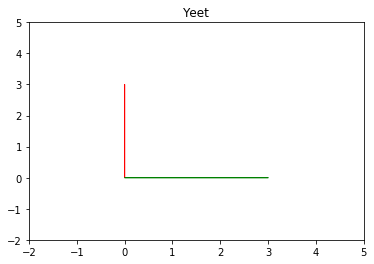

In [11]:
vector_1 = [0, 3]
vector_2 = [3, 0]

plt.arrow(0, 0, vector_1[0], vector_1[1], color='red')
plt.arrow(0, 0, vector_2[0], vector_2[1], color='green')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.title("Yeet")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [12]:
a = np.array([
              [-5],
              [3],
              [7]
              ])

b = np.array([
              [6],
              [-8],
              [2]
              ])

# a = [-5, 3, 7]


np.dot(a.T, b)

array([[-40]])

#Not orthogonal since dotproduct !=0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
c = np.array([2, -15, 6, 20])

magnitude_c = np.linalg.norm(c)
mag_sqrd_c = magnitude_c**2
print('The magnitude of c squared is: ' + str(mag_sqrd_c))

The magnitude of c squared is: 665.0


In [14]:
print(np.dot(c, c))

665


In [15]:
c_tpose = c.T
c_tpose * c

array([  4, 225,  36, 400])

#They all add up to 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

#Linear Combinations:
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 3\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8)\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + (-8)\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [16]:
f = np.array([4, 12, 11, 9, 2])

norm = np.linalg.norm(f)
norm
f / norm

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


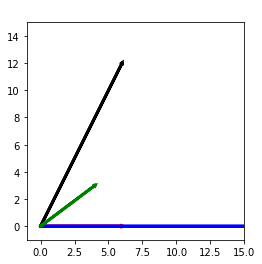

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Axis Bounds
plt.xlim(-1,15)          
plt.ylim(-1,15)



# dependent Vectors
i_hat = [6, 0, 0]


j_hat = np.multiply(3, i_hat)


l_hat = [6, 12, 4]
m_hat = [4, 3, 2]
# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, l_hat[0], l_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')
plt.arrow(0, 0, m_hat[0], m_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Vectors, man", color='white')
plt.show();



# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [34]:
g = [1, 2]
h = [4, 8]
array = np.array([g + h])
np.linalg.matrix_rank(array)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [31]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

array = np.array([l + m + n]).reshape(3, 3).T
array
np.linalg.matrix_rank(array)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [23]:
p = np.array([
              [1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]
              ])

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()